## Preamble

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
import itertools
from sklearn.metrics import confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.groupby(['Churn'], as_index=False).count()[['Churn', 'customerID']]

,Churn,customerID
0,No,5174
1,Yes,1869


Let's see how attributes like Senior Citizen, Tenure, Monthly Charges interact with each other

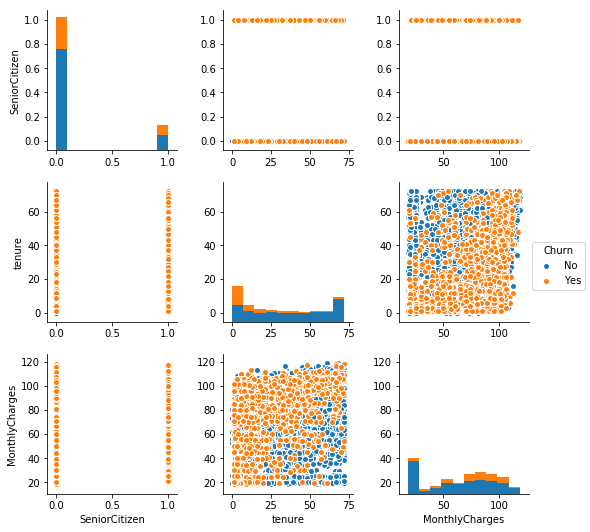

In [6]:
sns.pairplot(df[['Churn', 'SeniorCitizen', 'tenure', 'MonthlyCharges']], hue = 'Churn')

Let's see the churn distribution

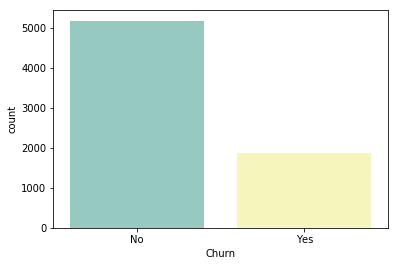

In [7]:
ax = sns.countplot(x = 'Churn', data = df, palette = 'Set3')

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

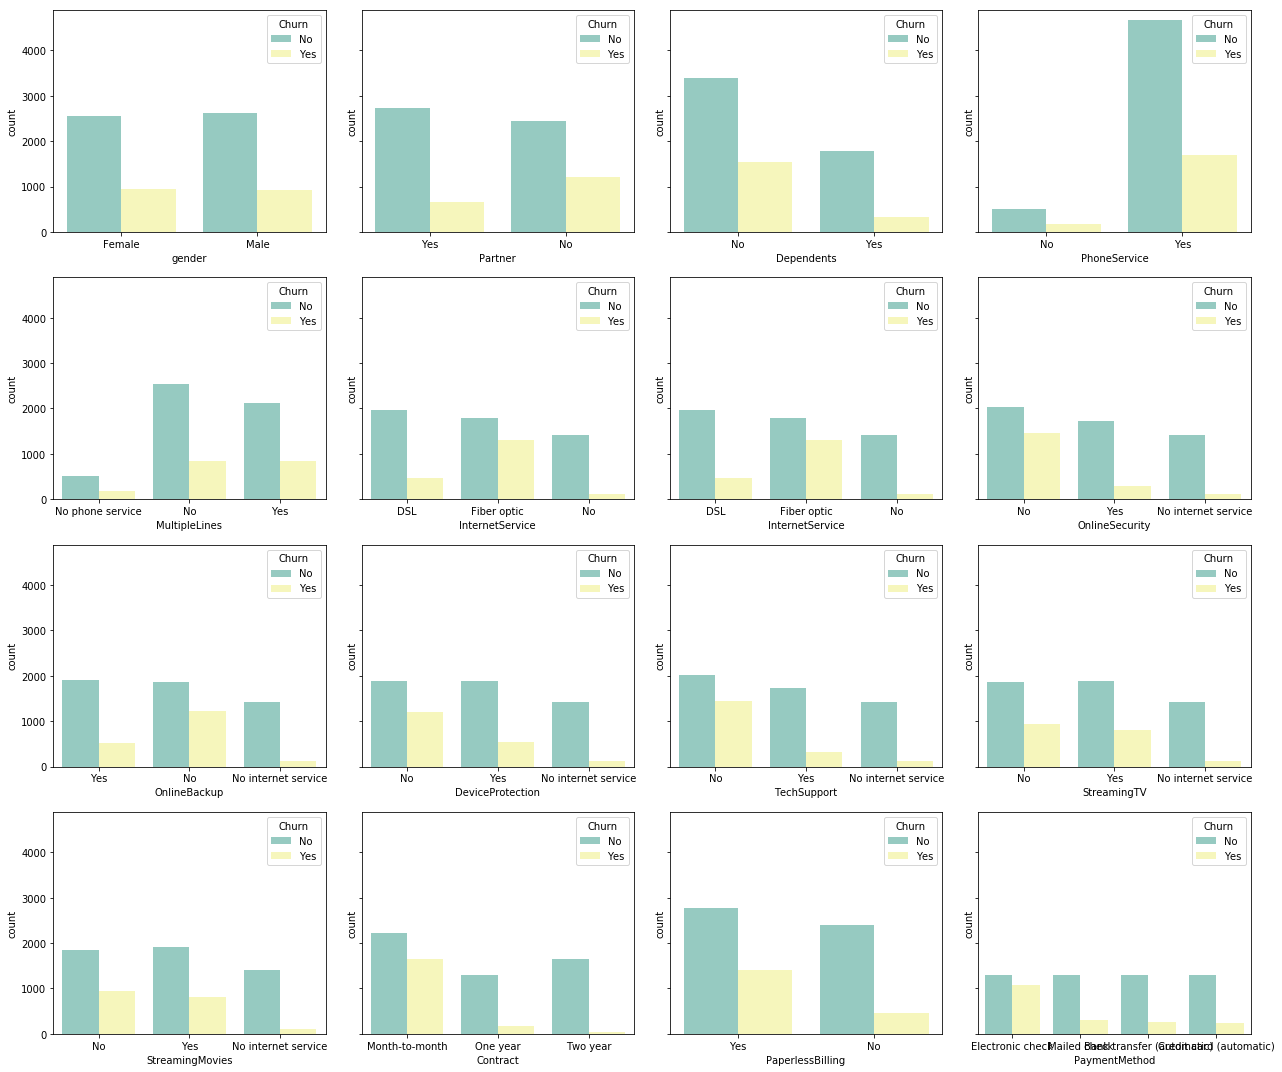

In [9]:
f, axes = plt.subplots(ncols = 4, nrows = 4, figsize = (18, 15), sharey = True)


sns.countplot(x = 'gender', hue = 'Churn', data = df, palette = 'Set3', ax = axes[0, 0])
sns.countplot(x = 'Partner', hue = 'Churn', data = df, palette = 'Set3', ax = axes[0, 1])
sns.countplot(x = 'Dependents', hue = 'Churn', data = df, palette = 'Set3', ax = axes[0, 2])
sns.countplot(x = 'PhoneService', hue = 'Churn', data = df, palette = 'Set3', ax = axes[0, 3])

sns.countplot(x = 'MultipleLines', hue = 'Churn', data = df, palette = 'Set3', ax = axes[1, 0])
sns.countplot(x = 'InternetService', hue = 'Churn', data = df, palette = 'Set3', ax = axes[1, 1])
sns.countplot(x = 'InternetService', hue = 'Churn', data = df, palette = 'Set3', ax = axes[1, 2])
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = df, palette = 'Set3', ax = axes[1, 3])

sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = df, palette = 'Set3', ax = axes[2, 0])
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = df, palette = 'Set3', ax = axes[2, 1])
sns.countplot(x = 'TechSupport', hue = 'Churn', data = df, palette = 'Set3', ax = axes[2, 2])
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = df, palette = 'Set3', ax = axes[2, 3])

sns.countplot(x = 'StreamingMovies', hue = 'Churn', data = df, palette = 'Set3', ax = axes[3, 0])
sns.countplot(x = 'Contract', hue = 'Churn', data = df, palette = 'Set3', ax = axes[3, 1])
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = df, palette = 'Set3', ax = axes[3, 2])
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df, palette = 'Set3', ax = axes[3, 3])



plt.tight_layout()

Let's see the histograms one at a time, below are our inference:
- All genders have same split for the churn (yes/no)
- Customers who are not partner churn more
- Customers with dependents are less but then they churn less than the one's without dependents
- People with multiple lines churn slightly more than the one's without multiple lines
- Customers using fiber optic internet service are not happy, they churn alot!
- Customers without online security churn alot
- Without online back-up, customers churn almost twice as much as with online back-up
- Without device protection and tech support, customers churn
- Streaming Tv's and movies don't have impact on churning
- As contract length increases, churn rate decreases
- Folks using electronic checks for payment churn more than others

Now, based on the above information let's convert our dataset into a binary values (0|1)

In [10]:
df1 = pd.DataFrame()

# Who are not a partner churn more
df1['Partner'] = pd.Series(np.where(df.Churn == 'No', 1, 0))

# Cutomers without dependents churn more
df1['Dependents'] = pd.Series(np.where(df.Churn == 'No', 1, 0))

# Multiple lines: yes, churn more
df1['MultipleLines'] = pd.Series(np.where(df.Churn == 'Yes', 1, 0))

# InternetService: Fiber optic, churn more
df1['InternetService'] = pd.Series(np.where(df.Churn == 'Fiber optic', 1, 0))

#Customers without online security churn alot
df1['OnlineSecurity'] = pd.Series(np.where(df.Churn == 'No', 1, 0))

# Without online back-up, customers churn almost twice as much as with online back-up
df1['OnlineBackup'] = pd.Series(np.where(df.Churn == 'No', 1, 0))

# Without device protection and tech support, customers churn
df1['DeviceProtection'] = pd.Series(np.where(df.Churn == 'No', 1, 0))
df1['TechSupport'] = pd.Series(np.where(df.Churn == 'No', 1, 0))

# As contract length increases, churn rate decreases
df1['Contract'] = pd.Series(np.where(df.Churn == 'Month-to-month', 1, 0))

# Paperless billing churns more
df1['PaperlessBilling'] = pd.Series(np.where(df.Churn == 'Yes', 1, 0))

# Folks using electronic checks for payment churn more than others
df1['PaymentMethod'] = pd.Series(np.where(df.Churn == 'Electronic check', 1, 0))

# Churn
df1['Churn'] = pd.Series(np.where(df.Churn == 'Yes', 1, 0))

df1.head()

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,1,0,0,1,1,1,1,0,0,0,0
1,1,1,0,0,1,1,1,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,1
3,1,1,0,0,1,1,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1


In [11]:
## Create an instance of a LogisticRegression() model named lm
lg = LogisticRegression()

In [12]:
df_X = np.array(df1[['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']])
df_y = np.array(df1['Churn']).flatten()

# 70-30 split for USA since it has more data points
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=361)

In [13]:
lg = lg.fit(X_train,y_train)

In [14]:
# The coefficients
print('\nTraining score: ', round(lg.score(X_train, y_train), 2))
print('Training MSE: ', round(metrics.mean_squared_error(y_train, lg.predict( X_train)), 2))
print('\nTesting score: ', round(lg.score(X_test, y_test), 2))
print('Testing MSE: ', round(metrics.mean_squared_error(y_test, lg.predict( X_test)), 2))


Training score:  1.0
Training MSE:  0.0

Testing score:  1.0
Testing MSE:  0.0


### Confusion Matrix

Confusion matrix, without normalization
[[1568    0]
 [   0  545]]
Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


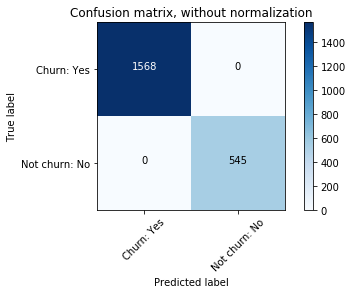

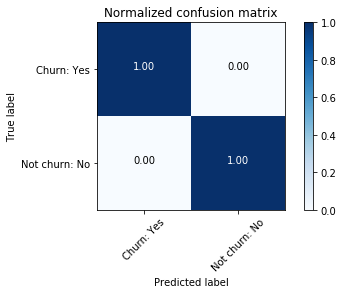

In [15]:
## Confusion Matrix

class_names = ['Churn: Yes', 'Not churn: No']

y_pred = lg.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()